In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [3]:
import  tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

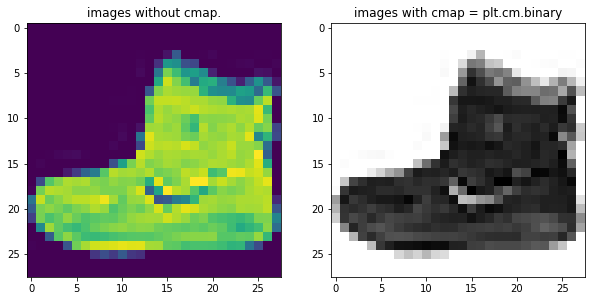

In [5]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(121)
ax.set_title("images without cmap.")
ax.imshow(train_images[0])

ax2 = fig.add_subplot(122)
ax2.set_title("images with cmap = plt.cm.binary")
ax2.imshow(train_images[0], cmap = plt.cm.binary)

plt.show()

In [6]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
             'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
print("Size of Training Images: " + str(train_images.shape))
print("Size of Training Labels: " + str(train_labels.shape))

print("Size of Testing Images: " + str(test_images.shape))
print("Size of Testing Labels: " + str(test_labels.shape))

print("Training Set Labels: " + str(train_labels))
print("Testing Set Labels: " + str(test_labels))

#Normalized
train_images = train_images / 255.0
test_images = test_images / 255.0

Size of Training Images: (60000, 28, 28)
Size of Training Labels: (60000,)
Size of Testing Images: (10000, 28, 28)
Size of Testing Labels: (10000,)
Training Set Labels: [9 0 0 ... 3 0 5]
Testing Set Labels: [9 2 1 ... 8 1 5]


# Further Data Preprocessing
In convolution NN, we need to feed the data in the form of a 4D array as follows: 

* (num_images, x-dims, y_dims, num_channels_per_images)

As our images is grayscale, we will reshape input data from (28, 28) to (28, 28, 1)

In [8]:
w, h = 28, 28
train_images = train_images.reshape(train_images.shape[0], w, h, 1)
test_images = test_images.reshape(test_images.shape[0], w, h, 1)

# Defining Convolution Layers

Let us see how to define convolution, max pooling, and dropout layers

## Convolution Layer
We will be using the following API to defin the Convolution Layer
####    tf.keras.layers.Con2D(filters, kernel_size, padding='valid', activation = None, input_shape)

# 

<li> filters : The dimensionality of the output space.

<li> kernel_size : An interger or tuple/list of 2 integers. Specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions

<li>padding : One of "valid" or "same" (case : insensitive)

<li>activation : Activation function to use. (e.g. tanh, sigmoid, relu,..)</li>

## Pooling Layer

#### tf.keras.layers.MaxPooling2D(pool_size = 2)
## 
<li> pool_size : Size of the max pooling window</li>


## Dropout
Dropout is an approach to regularization in neural networks which helps reduce interdependent learning amongst the neurons.

Simply put, dropout refers to ignoring units(i.e. neurons) during the training phase, with a certain set of neurons chosen at random. By "ignoring" we mean these units are not considered during a particular forward or backward pass

It is defined by the following function

#### tf.keras.layers.Dropout(0.3)
# 
<li> Parameter: Fraction of the input units to drop (float between 0 and 1)</li>

# Define our Model and Training
### Build five layer model

### <li> Input layers : (28, 28, 1) </li>

* Size of the input images.

### <li>Convolution layers:</li>

* First layer : Kernel size : (2 x 2), resulting in 64 channels
* -->Pooling of size (2 x 2) makes the layer (14 x 14 x 64)

* Second layer : Kernel size : (2 x 2), resulting in 32 channels
* -->Pooling of size (2 x 2) makes the layer (7 x 7 x 32)

### <li> Fully connected layers: </li>

* Flatten the convolution layers to 1567 nodes (7 x 7 x 32)
* Dense layer of size 256

### <li> Output layer : </li>
* Dense layer with 10 classes using softmax activation

In [9]:
from tensorflow.keras import backend as K
import tensorflow as tf
K.clear_session()
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size = 2))

#model.add(tf.keras.layers.Dropout(0.3))
# Second Convolution layer
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = 2))
model.add(tf.keras.layers.Dropout(0.3))

# Fully connected layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

#Take a look at the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               4

# Compile the model

Before the model is ready for training. it needs a few mode setting. These are added during the model's compile step.

* Loss function -- This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* Optimizer -- This is how the model is updated based on the data it sees and its loss function.
* Metrics -- Used to monitor the training and testing steps. The following example uses aaccuracy. the fraction of the images that ate corrctly classified.

In [10]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train the model
Training the neural network model requires the following steps:

<li>1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels array.
    
<li>2. The model learns to associate images and labels.
 
<li>3. You ask the model to make predictions about a test set -- in this example, the test_images array. Verify that the predictions match the labels from the **test_labels** array.</li>

Call the **model.fit** to train data

Epoch 1/10
938/938 [==============================] - 9s 4ms/step - loss: 0.5367 - accuracy: 0.8048
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3715 - accuracy: 0.8649
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3240 - accuracy: 0.8815
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3002 - accuracy: 0.8896
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2824 - accuracy: 0.8946
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2684 - accuracy: 0.9007
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2560 - accuracy: 0.9057
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2436 - accuracy: 0.9097
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2364 - accuracy: 0.9124
Epoch 10/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2286 - accuracy: 0.9158

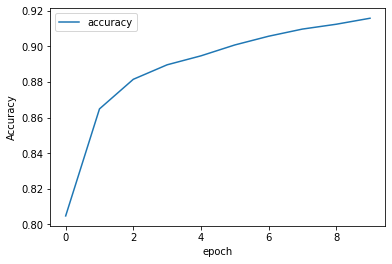

In [11]:
history = model.fit(train_images, train_labels, batch_size = 64, epochs = 10)

plt.plot(history.history["accuracy"], label = "accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(loc = "best")
plt.show()

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 1)
print("Test accuracy: ", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2263 - accuracy: 0.9185
Test accuracy:  0.9185000061988831


# Save Model

In [13]:
!mkdir saved_model
model.save('saved_model/CNN_model')

INFO:tensorflow:Assets written to: saved_model/CNN_model\assets


# Inspect the file

In [22]:
ls saved_model

 磁碟區 C 中的磁碟是 Windows
 磁碟區序號:  4AD3-056E

 C:\Users\kozak\Desktop\NCHC Intern\Python_Training\NN Training\saved_model 的目錄

2022/08/03  下午 01:38    <DIR>          .
2022/08/03  下午 01:38    <DIR>          ..
2022/08/03  下午 01:38    <DIR>          CNN_model
               0 個檔案               0 位元組
               3 個目錄  48,104,513,536 位元組可用


# Load the Model

In [23]:
New_CNN_Model = tf.keras.models.load_model('saved_model/CNN_model')

New_CNN_Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               4

# Evaluate the restored model

In [24]:
loss, accuracy = New_CNN_Model.evaluate(test_images, test_labels, verbose = True)
print('Restored model, Accuracy : {:5.2f}%'.format(100 * accuracy))

print(New_CNN_Model.predict(test_images).shape)

313/313 [==============================] - 1s 2ms/step - loss: 0.2263 - accuracy: 0.9185
Restored model, Accuracy : 91.85%
(10000, 10)


# Save model in HDF5 format

In [25]:
model.save('CNN_model.h5')

# Recreate the model from HDF5 file

In [26]:
HDF_CNN_Model = tf.keras.models.load_model('CNN_model.h5')
HDF_CNN_Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               4

# Check its Accuracy

In [28]:
loss, accuracy = HDF_CNN_Model.evaluate(test_images, test_labels, verbose = True)
print('Restored model, Accuracy: {:5.2f}%'.format(100 * accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.2263 - accuracy: 0.9185
Restored model, Accuracy: 91.85%
0.22625823318958282


# Making Predictions

In [29]:
# Making predictions from the test_images

predictions = model.predict(test_images)

In [30]:
# Reshape the data from (28, 28, 1) to (28, 28)
w, h = 28, 28
train_images = train_images.reshape(train_images.shape[0], w, h)
test_images = test_images.reshape(test_images.shape[0], w, h)

#Define a function to help us plot the images
def plot_images(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label], 100*np.max(predictions_array), class_name[true_label]), color = color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array,  true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = "#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

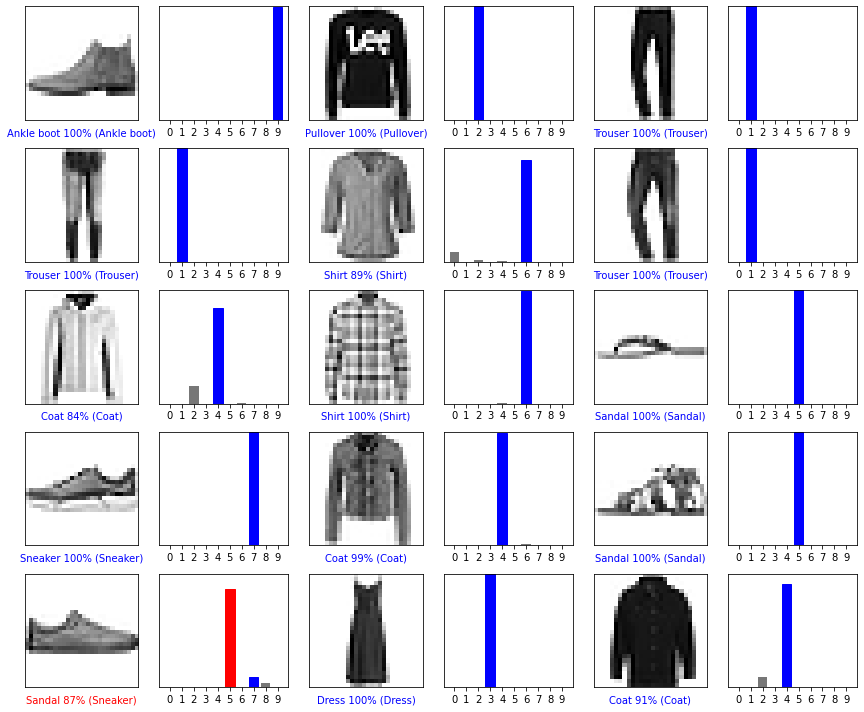

In [31]:
# plot the first x test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize = (2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_images(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()